In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("data_cleaned.csv", index_col=0)

In [3]:
df.head()

,Repository,Sujets,Etoiles,Langages,PullRequests,Forks,NumberOfContributors,Comments,Tags
0,SysCV/sam-hq,"['sam', 'segmentation', 'segment-anything', 'z...",1758.0,['Python'],0.0,56.0,1.0,0.0,0.0
1,Not-Quite-RARBG/main,"['rarbg', 'torrent', 'torrents']",610.0,['JavaScript'],0.0,21.0,7.0,1.0,0.0
2,mit-han-lab/llm-awq,No Topic,354.0,"['Python', 'Cuda', 'Shell', 'C++', 'C']",0.0,24.0,3.0,0.0,0.0
3,KasperskyLab/triangle_check,No Topic,299.0,['Python'],0.0,18.0,4.0,0.0,1.0
4,damo-vilab/videocomposer,No Topic,229.0,"['Python', 'Shell']",0.0,6.0,2.0,0.0,0.0


# Data Mining

In [20]:
# Quelle(s) relation(s) entre les colonnes ?
# Quelle(s) distribution(s) des variables ?
# Quels sont les langages les plus utilisés ?
# Quels sont les sujets les plus récurrents/traités ?
# Quels sont les projets et les sujets intéressants ?
# Quelles sont les tendances de développement ?


# Quels sont les langages tendance ?
# Quels sont les projets tendance ?
# Les projets tendance sont-ils des projets intéressants ?

# Suivre les évolutions technologiques
# Explorer de potentielles opportunités de collaboration

In [4]:
correlation_matrix_pearson = df[["Etoiles", "Forks", "NumberOfContributors", "Comments", "Tags"]].corr(method='pearson')
correlation_matrix_pearson

,Etoiles,Forks,NumberOfContributors,Comments,Tags
Etoiles,1.000000,0.673447,0.012466,0.002393,0.001211
Forks,0.673447,1.000000,0.033620,0.011364,0.009073
NumberOfContributors,0.012466,0.033620,1.000000,0.023391,0.260007
Comments,0.002393,0.011364,0.023391,1.000000,0.074658
Tags,0.001211,0.009073,0.260007,0.074658,1.000000


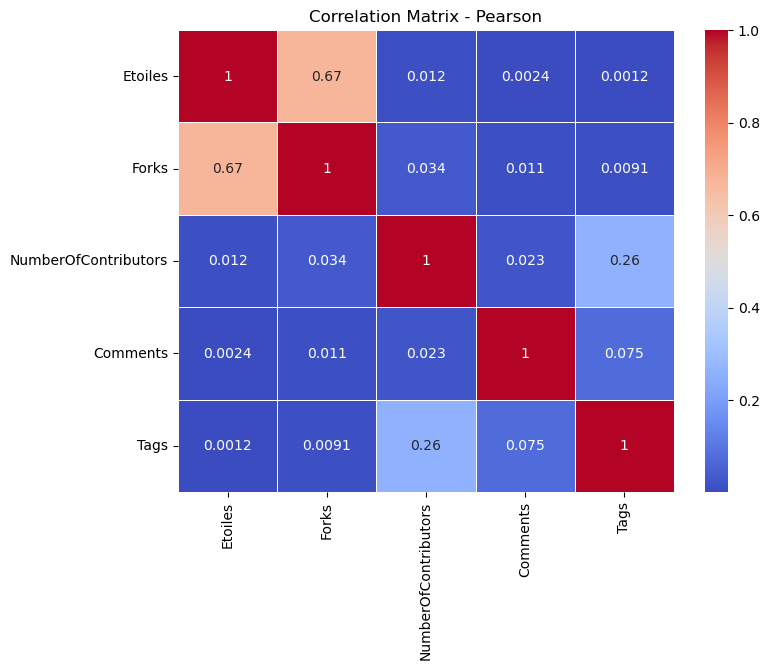

In [5]:
# Représentation graphique de la matrice
import seaborn as sns
import matplotlib.pyplot as plt

# Plot correlation matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix_pearson, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix - Pearson')
plt.show()

La corrélation de Pearson est une mesure de la corrélation linéaire entre deux variables continues. Elle calcule le coefficient de corrélation de Pearson, qui varie de -1 à 1. Une corrélation de 1 indique une corrélation linéaire positive parfaite, une corrélation de -1 indique une corrélation linéaire négative parfaite, et une corrélation de 0 indique une absence de corrélation linéaire. La corrélation de Pearson suppose que les variables sont distribuées normalement.

Les résultats présentés montrent soit une faible correlation entre "Etoiles" <===>"Forks", soit une très faible correlation, voire pas de relation. Il n'existe donc pas de relation lineaire entre les différents champs de notre dataset.  

Vérifions donc la distribution des variables 

# La distribution des variables 

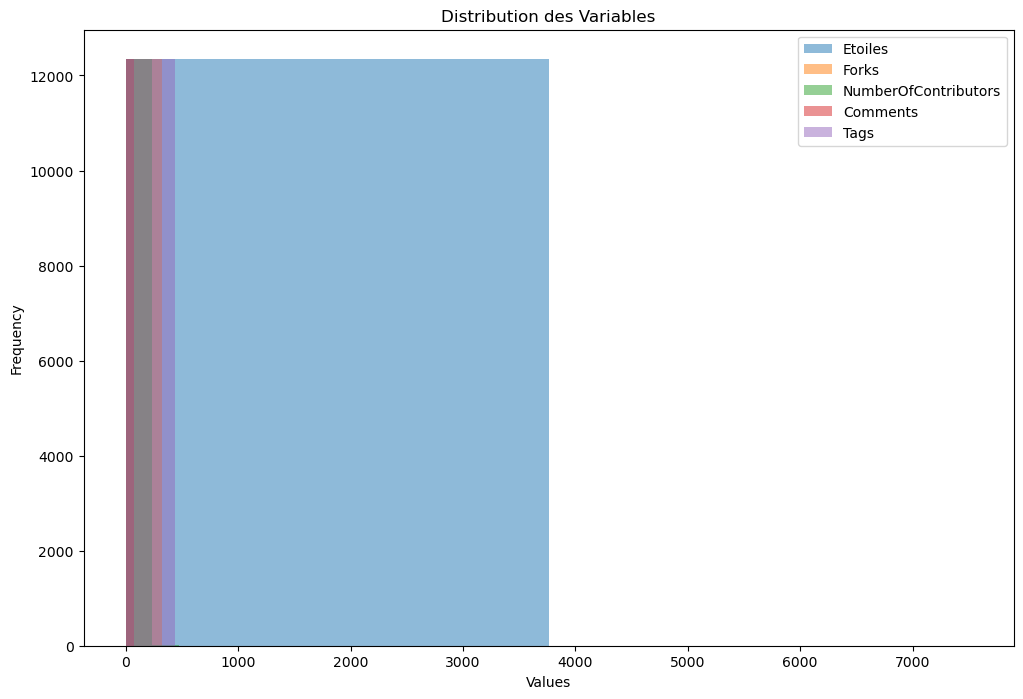

In [28]:
import matplotlib.pyplot as plt
data = df[["Etoiles", "Forks", "NumberOfContributors", "Comments", "Tags"]]
# Plot distribution of each variable
plt.figure(figsize=(12, 8))

# Iterate over each column in the DataFrame
for column in data.columns:
    plt.hist(data[column], bins=2, alpha=0.5, label=column)

plt.legend(loc='upper right')
plt.title('Distribution des Variables')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.show()

Distribution inconnue

# Langages et technologies les plus utilisés

In [7]:
langages = []
for i in range(df.shape[0]):
    if df["Langages"][i] != "No Langage":
        langages.extend(eval(df["Langages"][i]))
    else:
        langages.append("No Langage")

TypeError: eval() arg 1 must be a string, bytes or code object

In [8]:
from collections import Counter

occurrences = Counter(langages)

for element, count in occurrences.items():
    print(f"{element}: {count}")

Python: 62
JavaScript: 42
Cuda: 3
Shell: 24
C++: 11
C: 10
Jupyter Notebook: 9
No Langage: 31
TypeScript: 16
Rust: 3
Lua: 1
Tcl: 1
Ruby: 4
HTML: 28
CSS: 23
Java: 3
Dockerfile: 10
CMake: 2
Go: 7
Vue: 5
SCSS: 4
Makefile: 12
PHP: 4
Agda: 1
Dart: 2
Swift: 4
Kotlin: 2
Objective-C: 4
Nix: 1
Procfile: 1
Batchfile: 5
AppleScript: 1
Assembly: 2
CUE: 1
C#: 4
Pascal: 1
Logos: 1
Common Lisp: 1
Blade: 2
Processing: 1
HLSL: 1
Julia: 1
Svelte: 2
ASL: 1


[Cuda, Shell, No Langage, Dockerfile, CMake, Makefile, Nix, Procfile, CUE, Blade, ASL] ne sont pas des langages de programmation. Les outils comme Jupyter Notebook et les frameworks comme Vue seront utilisés pour détecter les technologies et les frameworks les plus utilisés

In [10]:
excluded_languages = ["Cuda", "Shell", "No Langage", "Batchfile", "Dockerfile", "CMake",
                      "Makefile", "Nix", "Procfile", "CUE", "Blade", "ASL"]
#technologies = ["Jupyter Notebook", "Vue"]

# Create a new dictionary without the excluded languages
filtered_occurrences = {language: count for language, count in occurrences.items() if language not in excluded_languages}
#filtered_technologies = {language: count for language, count in occurrences.items() if language not in technologies}

# Sort the dictionary by occurrence count in descending order
sorted_occurrences = dict(sorted(filtered_occurrences.items(), key=lambda x: x[1], reverse=True))
#sorted_technologies = dict(sorted(filtered_occurrences.items(), key=lambda x: x[1], reverse=True))

# Print the sorted occurrences
for language, count in sorted_occurrences.items():
    print(f"{language}: {count}")

Python: 62
JavaScript: 42
HTML: 28
CSS: 23
TypeScript: 16
C++: 11
C: 10
Jupyter Notebook: 9
Go: 7
Vue: 5
Ruby: 4
SCSS: 4
PHP: 4
Swift: 4
Objective-C: 4
C#: 4
Rust: 3
Java: 3
Dart: 2
Kotlin: 2
Assembly: 2
Svelte: 2
Lua: 1
Tcl: 1
Agda: 1
AppleScript: 1
Pascal: 1
Logos: 1
Common Lisp: 1
Processing: 1
HLSL: 1
Julia: 1


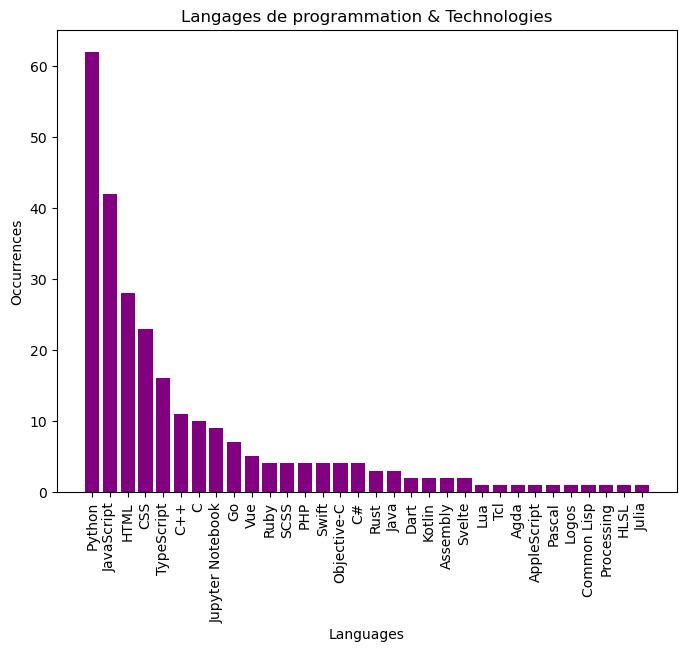

In [11]:
from collections import Counter
import matplotlib.pyplot as plt
#---------------------------------------avec matplotlib-------------------------------------------
# occurrences = Counter(langages)

#Extract the languages and their respective counts
languages = sorted_occurrences.keys()
counts = sorted_occurrences.values()

# Plot the occurrences as a bar plot
plt.figure(figsize=(8, 6))
plt.bar(languages, counts, color = "purple")
plt.title('Langages de programmation & Technologies')
plt.xlabel('Languages')
plt.ylabel('Occurrences')
plt.xticks(rotation='vertical')
plt.show()
#--------------------------------------avec Bokeh----------------------------------------------
# from bokeh.plotting import figure, show

# # Prepare some data
# languages = list(sorted_occurrences.keys())  # Convert keys to a list
# counts = list(sorted_occurrences.values())  # Convert values to a list

# # Create a new plot with a title and axis labels
# p = figure(title="Programming Languages & Technologie", x_axis_label="Languages", y_axis_label="Counts")

# # Create vertical bars using the vbar glyph
# p.vbar(x=languages, top=counts, width=0.5, bottom=0, color="purple")

# # Show the plot
# show(p)

In [15]:
# from collections import Counter
# import matplotlib.pyplot as plt

# # occurrences = Counter(langages)

# # Extract the languages and their respective counts
# tech = sorted_technologies.keys()
# counts = sorted_technologies.values()

# # Plot the occurrences as a bar plot
# plt.figure(figsize=(8, 6))
# plt.bar(tech, counts)
# plt.title('Langages de programmation & Technologies')
# plt.xlabel('Languages')
# plt.ylabel('Occurrences')
# plt.xticks(rotation='vertical')
# plt.show()

# Les sujets les plus récurrents/Traités

In [16]:
# df[df.index == 202]

In [12]:
sujets = []

for i in range(df.shape[0]):
    if df.iloc[i, 1] != "No Topic":
        sujets.extend(eval(df.iloc[i, 1]))
    else:
        sujets.append("No Topic")

TypeError: eval() arg 1 must be a string, bytes or code object

In [13]:
from collections import Counter

occurrences_topic = Counter(sujets)

for element, count in occurrences_topic.items():
    print(f"{element}: {count}")

sam: 2
segmentation: 2
segment-anything: 1
zero-shot-segmentation: 1
high-quality: 1
rarbg: 1
torrent: 1
torrents: 1
No Topic: 10327
text-to-image-diffusion: 1
personalized-generation: 1
monorepo: 2
monorepos: 1
nx: 2
nx-workspace: 2
neovim-theme: 1
dark-theme: 2
lua: 6
neovim: 2
treesitter: 1
sniper-bot: 2
nerf: 1
texture-synthesis: 1
bubbletea: 1
charmcli: 1
go: 8
golang: 12
ai: 17
bubbles: 1
charmbracelet: 1
github-actions: 4
lipgloss: 1
openai: 14
openai-api: 6
tui: 2
cobra: 2
cobra-cli: 2
chatgpt3: 1
gui-application: 1
tkinter-python: 1
diffusion-models: 3
large-language-models: 5
long-context: 1
rce-exploit: 1
rocketmq: 1
cve-2023-33246: 1
proxy-addr: 1
proxy-check: 1
proxy-checker: 2
proxy-checker-free: 1
proxy-checker-github: 1
proxy-checking: 1
proxy-grabbed: 1
proxy-grabber: 1
proxy-scrap: 1
proxy-scraper: 2
proxy-scrapers: 1
proxy-scrapper: 1
proxy-scrappers: 1
proxy-tool: 1
proxy-tools: 1
telegram-add-group: 1
telegram-add-members: 1
telegram-adder: 1
telegram-adder-tool: 1

In [14]:
# Ordre croissant
sorted_occurrences_topic = dict(sorted(occurrences_topic.items(), key=lambda x: x[1], reverse=True))
sorted_occurrences_topic

{'No Topic': 10327,
 'python': 41,
 'chatgpt': 23,
 'javascript': 22,
 'config': 21,
 'react': 20,
 'github-config': 20,
 'typescript': 18,
 'ai': 17,
 'android': 17,
 'openai': 14,
 'nodejs': 13,
 'golang': 12,
 'html': 12,
 'java': 12,
 'llm': 11,
 'css': 11,
 'machine-learning': 10,
 'rust': 10,
 'tailwindcss': 10,
 'api': 10,
 'reactjs': 10,
 'deep-learning': 9,
 'nextjs': 9,
 'go': 8,
 'discord': 8,
 'flutter': 8,
 'langchain': 8,
 'cli': 7,
 'ios': 7,
 'swift': 7,
 'github': 7,
 'cpp': 7,
 'lua': 6,
 'openai-api': 6,
 'pytorch': 6,
 'google': 6,
 'gpl3': 6,
 'gplv3': 6,
 'markdown': 6,
 'md': 6,
 'txt': 6,
 'nlp': 6,
 'game': 6,
 'gpt-4': 6,
 'kotlin': 6,
 'large-language-models': 5,
 'macos': 5,
 'vue': 5,
 'svelte': 5,
 'vite': 5,
 'json': 5,
 'python3': 5,
 'github-actions': 4,
 'c': 4,
 'telegram': 4,
 'discord-bot': 4,
 'streamlit': 4,
 'project': 4,
 'jetpack-compose': 4,
 'website': 4,
 'laravel': 4,
 'html-css-javascript': 4,
 'php': 4,
 'jupyter-notebook': 4,
 'minecraft

In [17]:
excluded_topics = ["No Topic"]
#technologies = ["Jupyter Notebook", "Vue"]

# Create a new dictionary without the excluded languages
filtered_occurrences_topic = {topic: count for topic, count in occurrences_topic.items() if topic not in excluded_topics}
#filtered_technologies = {language: count for language, count in occurrences.items() if language not in technologies}

# Sort the dictionary by occurrence count in descending order
sorted_occurrences_topic = dict(sorted(filtered_occurrences_topic.items(), key=lambda x: x[1], reverse=True))
#sorted_technologies = dict(sorted(filtered_occurrences.items(), key=lambda x: x[1], reverse=True))

# Print the sorted occurrences
top_topics= []
for topic, count in sorted_occurrences.items():
    top_topics.append([topic, count])
#     print(f"{topic}: {count}")
top_topics

[['Python', 62],
 ['JavaScript', 42],
 ['HTML', 28],
 ['CSS', 23],
 ['TypeScript', 16],
 ['C++', 11],
 ['C', 10],
 ['Jupyter Notebook', 9],
 ['Go', 7],
 ['Vue', 5],
 ['Ruby', 4],
 ['SCSS', 4],
 ['PHP', 4],
 ['Swift', 4],
 ['Objective-C', 4],
 ['C#', 4],
 ['Rust', 3],
 ['Java', 3],
 ['Dart', 2],
 ['Kotlin', 2],
 ['Assembly', 2],
 ['Svelte', 2],
 ['Lua', 1],
 ['Tcl', 1],
 ['Agda', 1],
 ['AppleScript', 1],
 ['Pascal', 1],
 ['Logos', 1],
 ['Common Lisp', 1],
 ['Processing', 1],
 ['HLSL', 1],
 ['Julia', 1]]

L'analyse des sujets vient en complément et en écho à l'analyse des langages les plus utilisés. Python, JavaScript et TypeScript confirment leur place. Mais d'autres langages comme Java, Rust, Go, Swift, Lua, Julia, Kotlin, Dart, C, C++, C#, PHP, Dart, Pascal, Objective-C apparaissent aussi dans les sujets les plus traités.
De plus, nous savons désormais que  les technologies telles React, NodeJs, NextJs, VueJS, Svelte, Vite, Vue, Golang, Jupyter Notebook, Laravel, Spring boot sont les discutés et traités.

In [18]:
excluded_topics = ["No Topic"]
#technologies = ["Jupyter Notebook", "Vue"]

# Create a new dictionary without the excluded languages
filtered_occurrences_topic = {topic: count for topic, count in occurrences_topic.items() if topic not in excluded_topics}
#filtered_technologies = {language: count for language, count in occurrences.items() if language not in technologies}

# Sort the dictionary by occurrence count in descending order
sorted_occurrences_topic = dict(sorted(filtered_occurrences_topic.items(), key=lambda x: x[1], reverse=True))
#sorted_technologies = dict(sorted(filtered_occurrences.items(), key=lambda x: x[1], reverse=True))

# Print the sorted occurrences
i = 0
top_topics = []
for topic, count in sorted_occurrences.items():
    top_topics.append([topic, count])
    #print(f"{topic}: {count}")
    i += 1
    if i == 30:
        break
top_topics

[['Python', 62],
 ['JavaScript', 42],
 ['HTML', 28],
 ['CSS', 23],
 ['TypeScript', 16],
 ['C++', 11],
 ['C', 10],
 ['Jupyter Notebook', 9],
 ['Go', 7],
 ['Vue', 5],
 ['Ruby', 4],
 ['SCSS', 4],
 ['PHP', 4],
 ['Swift', 4],
 ['Objective-C', 4],
 ['C#', 4],
 ['Rust', 3],
 ['Java', 3],
 ['Dart', 2],
 ['Kotlin', 2],
 ['Assembly', 2],
 ['Svelte', 2],
 ['Lua', 1],
 ['Tcl', 1],
 ['Agda', 1],
 ['AppleScript', 1],
 ['Pascal', 1],
 ['Logos', 1],
 ['Common Lisp', 1],
 ['Processing', 1]]

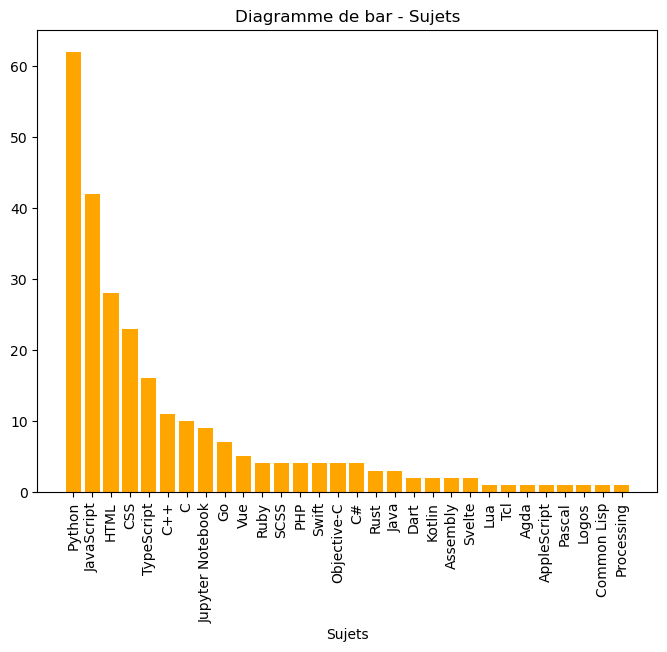

In [19]:
from collections import Counter
import matplotlib.pyplot as plt

# occurrences = Counter(langages)

# Extract the languages and their respective counts
topics = []
counts = []

for topic, count in top_topics:
    topics.append(topic)
    counts.append(count)

# Plot the occurrences as a bar plot
plt.figure(figsize=(8, 6))
plt.bar(topics, counts, color = "orange")
plt.title('Diagramme de bar - Sujets')
plt.xlabel('Sujets')
#plt.ylabel('Occurrences')
plt.xticks(rotation='vertical')
plt.show()

On se rend compte que parmi les sujets dont on traite et parle le plus, il ya python, chatGPT, javascript, le machine learning, le deep learning. De façon générale, il s'agit de développement web et d'intelligence artificielle. Rien de surprenant vu l'émergence des GenAI comme ChatGPT créé par OpenAI. Python étant le langage le plus utilisé en IA, il fait partie des sujets. Bien que l'IA ait le vent en poupe, le monde du développement bouillonne en silence. D'où la présence de langages comme HTML, CSS (TailWindCSS) et Javascript avec son framework React. Le developpement mobile n'est pas en reste notamment avec Flutter basé sur Dart, Swift orienté iOS.

In [20]:
df.head(2)

,Repository,Sujets,Etoiles,Langages,PullRequests,Forks,NumberOfContributors,Comments,Tags
0,SysCV/sam-hq,"['sam', 'segmentation', 'segment-anything', 'z...",1758.0,['Python'],0.0,56.0,1.0,0.0,0.0
1,Not-Quite-RARBG/main,"['rarbg', 'torrent', 'torrents']",610.0,['JavaScript'],0.0,21.0,7.0,1.0,0.0


# Quels sont les projets et les sujets intéressants ?

Les projets les plus intéressants sont ceux pour lesquels, il y a plus d'étoiles, de commentaires, de forks et de tags.
Les sujets les plus intéressants sont ceux qui suscitent le plus d'intéractions pour les projets associés et qui font partie des sujets les plus traités.

In [21]:
# Les projets les plus intéressants

top_5_stars = df.nlargest(5, "Etoiles")["Repository"]
top_5_forks = df.nlargest(5, "Forks")["Repository"]
top_5_comments = df.nlargest(5, "Comments")["Repository"]
top_5_tags = df.nlargest(5, "Tags")["Repository"]

interesting_projects = set(top_5_stars) | set(top_5_comments) | set(top_5_forks) | set(top_5_tags)
interesting_projects

{'100xDevs-hkirat/Week-1-assignment',
 '100xDevs-hkirat/Week-1-assignment-with-tests',
 '100xDevs-hkirat/Week-2-Assignments',
 'Liberluna/LiberChat',
 'MX56893/treetracker-map',
 'SysCV/sam-hq',
 'Vikash-8090-Yadav/DevWeek-Hack',
 'adoptium/jdk21',
 'baichuan-inc/baichuan-7B',
 'deadsnakes/python3.13-nightly',
 'facebookresearch/audiocraft',
 'facebookresearch/ijepa',
 'glitch-txs/w3',
 'openjdk/jdk21',
 'openjdk/jdk21u',
 'phuctm97/ai',
 'princeton-vl/infinigen',
 'vdutts7/yt-ai-chat'}

In [24]:
# Les sujets intéressants

interesting_subjects = df[df["Sujets"].isin(sorted_occurrences_topic)]
interesting_subjects.sum()

Repository              0.0
Sujets                  0.0
Etoiles                 0.0
Langages                0.0
PullRequests            0.0
Forks                   0.0
NumberOfContributors    0.0
Comments                0.0
Tags                    0.0
dtype: float64

In [22]:
# Les projets les plus intéressants

top_5_stars = df.nlargest(500, "Etoiles")["Sujets"]
top_5_forks = df.nlargest(500, "Forks")["Sujets"]
top_5_comments = df.nlargest(500, "Comments")["Sujets"]
top_5_tags = df.nlargest(500, "Tags")["Sujets"]

interesting_projects_top = set(top_5_stars) | set(top_5_comments) | set(top_5_forks) | set(top_5_tags)
interesting_projects_top

{'No Topic',
 "['2023', 'curseforge', 'malware', 'minecraft', 'fractureiser']",
 "['acl', 'authorization', 'fastify', 'fastify-plugin', 'access-control']",
 "['actions', 'binaryninja', 'binja', 'ci']",
 "['adversarial-attacks', 'llmops', 'prompt-injection', 'security', 'large-language-models']",
 "['agi', 'ai', 'chatglm-6b', 'llamacpp', 'llm', 'autonomous-agents']",
 "['ai', 'ai-agents', 'dinosaur-game', 'genetic-algorithm', 'machine-learning', 'neural-network', 'reinforcement-learning']",
 "['ai', 'git', 'go', 'helper', 'openai']",
 "['ai', 'golang', 'langchain', 'llm']",
 "['algebra', 'linear-algebra', 'university-course']",
 "['amateur-radio', 'ham-radio', 'lotw']",
 "['android', 'android-app', 'android-application', 'compose', 'jetpack-compose', 'koltin', 'kotlin-android']",
 "['android', 'apk', 'bugbounty', 'cordova', 'cybersecurity', 'mobile-security', 'pentesting-tools', 'bug-bounty', 'penetration-testing', 'pentesting', 'python']",
 "['android', 'binder', 'ipc', 'reverse-engine

Nous avons les sujets associés aux dépots les plus intéressants. D'une certaine façon, les dépots sont intéressants parce qu'ils traitent de sujets qui intéressent. Mais plusieurs sujets sont liés au meme dépot. Il se peut que seuls quelques projets soient intéressants donc suscitent les intéractions et attirent l'attention. Comment détecter alors ces sujets là de la liste de sujets associée à chaque dépot ? Notre proposition est de calculer la fréquence associée à chaque sujet en vue de prendre les plus sujets les plus récurrents associés aux dépots les plus intéressants.

In [24]:
occurrences = [
    ['2023', 'curseforge', 'malware', 'minecraft', 'fractureiser'],
    ['acl', 'authorization', 'fastify', 'fastify-plugin', 'access-control'],
    ['actions', 'binaryninja', 'binja', 'ci'],
    ['adversarial-attacks', 'llmops', 'prompt-injection', 'security', 'large-language-models'],
    ['agi', 'ai', 'chatglm-6b', 'llamacpp', 'llm', 'autonomous-agents'],
    ['ai', 'ai-agents', 'dinosaur-game', 'genetic-algorithm', 'machine-learning', 'neural-network', 'reinforcement-learning'],
    ['ai', 'git', 'go', 'helper', 'openai'],
    ['ai', 'golang', 'langchain', 'llm'],
    ['algebra', 'linear-algebra', 'university-course'],
    ['amateur-radio', 'ham-radio', 'lotw'],
    ['android', 'android-app', 'android-application', 'compose', 'jetpack-compose', 'koltin', 'kotlin-android'],
    ['android', 'apk', 'bugbounty', 'cordova', 'cybersecurity', 'mobile-security', 'pentesting-tools', 'bug-bounty', 'penetration-testing', 'pentesting', 'python'],
    ['android', 'binder', 'ipc', 'reverse-engineering'],
    ['appium', 'device-farm', 'testops', 'test-automation', 'testing-platform', 'infrastructure', 'testing', 'android', 'ci', 'ios', 'unity'],
    ['arduino', 'arduino-library', 'futaba', 'vfd-display', 'wiring', 'm202md10c'],
    ['arduino', 'attiny85', 'hacking', 'pentesting', 'redteam', 'offensive-security', 'penetration-testing-tools', 'hacking-tools', 'red-teaming', 't3l3machus'],
    ['articles', 'nextjs', 'react'],
    ['artificial-intelligence', 'deep-learning', 'machine-learning', 'face-detection', 'face-generation', 'face-pose', 'face-attributes', 'face-makeup', 'face-landmark', 'face-recognition', 'mobilenet', 'pytorch'],
    ['ast', 'dotlottie', 'javascript', 'lottie', 'typescript', 'unified'],
    ['audiocraft', 'generative-music', 'music', 'musicgen', 'trainer'],
    ['auto', 'discovery', 'macro', 'openapi', 'rust', 'swagger', 'utoipa', 'documentation', 'rest', 'api', 'swagger-documentation'],
    ['automation', 'autoreply', 'hastags', 'twitter', 'twitter-bot', 'twitter-tools'],
    ['bash', 'bun', 'cli', 'javascript', 'nodejs', 'shell'],
    ['bitcoin', 'bloc', 'flutter', 'hacker-news', 'nostr', 'stacker-news'],
    ['blackout', 'reddit', 'reddit-api', 'tracking'],
    ['blockchain', 'contracts', 'erc20', 'ethers', 'evm', 'protocol', 'provider', 'smart-contracts', 'types', 'typescript', 'web3'],
    ['blur', 'brightness', 'convolution', 'crop', 'forked-repo', 'gamma', 'image', 'resize', 'rotate', 'sharpness', 'cotrast', 'golang'],
    ['bubbletea', 'charmcli', 'go', 'golang', 'ai', 'bubbles', 'charmbracelet', 'github-actions', 'lipgloss', 'openai', 'openai-api', 'tui', 'cobra', 'cobra-cli'],
    ['bugbounty', 'recon'],
    ['bytecode'],
    ['cache', 'data', 'dictionary', 'ios', 'json', 'macos', 'memory', 'swift', 'tvos', 'watchos'],
    ['calculator', 'calculator-javascript', 'html-css-javascript', 'javascript', 'web-project'],
    ['cdn', 'npm', 'npmmirror', 'unpkg', 'web'],
    ['chat', 'ffmpeg', 'llm', 'no-code', 'video-processing'],
    ['chatbot', 'chatgpt', 'gpt-3', 'langchain', 'anthropic', 'claude', 'cohere', 'huggingface', 'llm', 'no-code'],
    ['chatgpt', 'chatgpt-sites', 'chatgptfree'],
    ['chatgpt', 'luci-app-openai', 'openai', 'openwrt'],
    ['chatgpt3', 'gui-application', 'tkinter-python'],
    ['cicd', 'github-actions', 'hashes', 'iac'],
    ['cli', 'dotenv', 'monorepo', 'nodejs'],
    ['cloudflare-workers', 'cloudflare-workers-kv', 'hono'],
    ['codigofacilito', 'downloader', 'python', 'script', 'selenium', 'selenium-python'],
    ['component', 'javascr', 'link', 'linktree', 'next', 'nextjs', 'react', 'reactjs', 'reactquery', 'supabase', 'zustan'],
    ['components', 'tailwindcss', 'web3'],
    ['concurrency', 'concurrency-patterns', 'golang'],
    ['config', 'python', 'su6', 'toml'],
    ['contributions-welcome', 'nodejs', 'opensource', 'project', 'telegraf', 'telegraf-bots', 'telegram-bot', 'typescript'],
    ['cross-platform', 'flutter', 'flutter-app', 'hyper', 'tabby', 'terminal', 'xterm'],
    ['cryptocurrency', 'dapp', 'metamask', 'smart-contracts', 'truffle'],
    ['css', 'html', 'javascript', 'react', 'investment-calculator'],
    ['css3', 'html5', 'javascript'],
    ['cuda', 'ffmpeg', 'yolov8'],
    ['cv-template', 'react'],
    ['deep-learning', 'geospatial', 'pytorch', 'qgis-plugin', 'satellite-images', 'segment-anything-model', 'segmentation'],
    ['designer-tool', 'image-processing', 'image-generation'],
    ['diablo4', 'lilith', 'overlay', 'altars'],
    ['diagrams', 'mermaid-diagrams', 'mermaidjs'],
    ['diffusion-models', 'image-generation', 'image-restoration'],
    ['diffusion-models'],
    ['discord', 'notion', 'producthunt', 'slack'],
    ['dns', 'dns-changer', 'dns-server', 'python-dns'],
    ['domain', 'nodejs', 'redirect', 'subdomain', 'typescript', 'vercel'],
    ['download', 'downloader', 'google', 'googlephoto', 'playwright', 'backup'],
    ['ergonomic'],
    ['framer-motion', 'nextjs13', 'react', 'reactjs-project', 'tailwindcss'],
    ['generator', 'icons', 'pwa', 'sharp', 'sharp-ico'],
    ['github', 'github-top-commits', 'top-commits'],
    ['go', 'libtorch', 'mlp'],
    ['golang-cli', 'go', 'golang', 'scaffold', 'ddd', 'gin'],
    ['gpt-4', 'stable-diffusion'],
    ['grpc', 'reality', 'sni', 'trojan', 'utls', 'v2ray', 'vmess', 'xray', 'trojan-grpc', 'vless', 'vmess-aead', 'x-ui', 'xray-core', 'xtls', 'xtls-rprx-vision', 'xtls-rprx-vision-udp443', 'vmess-reality', 'shadowsocks', 'subscription'],
    ['hook', 'react', 'scroll'],
    ['html5-css3', 'reactjs'],
    ['import', 'modules', 'rust'],
    ['ismoilovdev', 'open-source', 'open-source-developer-blog', 'os-dev-blog'],
    ['issues', 'metrics', 'ospo', 'actions', 'github-actions', 'python'],
    ['langchain', 'llm', 'prompt-engineering'],
    ['large-language-models', 'long-context'],
    ['licenses', 'licenseserver', 'springboot'],
    ['manga', 'nextjs', 'tailwindcss', 'webtoon'],
    ['midi', 'midi-clip', 'python', 'music', 'audio', 'mir', 'sound'],
    ['mips', 'mips-assembly'],
    ['monorepo', 'monorepos', 'nx', 'nx-workspace'],
    ['neovim-theme', 'dark-theme', 'lua', 'neovim', 'treesitter'],
    ['nerf', 'texture-synthesis'],
    ['nestjs', 'typescript'],
    ['nextjs', 'nextjs-template', 'nextjs13', 'nextui', 'template'],
    ['nextjs', 'planetscale', 'tailwindcss', 'vercel-deployment'],
    ['nlp', 'srl', 'syntax'],
    ['note', 'sticky', 'vue', 'webview2'],
    ['obsidian-md', 'obsidian-plugin', 'ai', 'snippets-manager'],
    ['obsidian-md'],
    ['payload-plugin', 'payload', 'payloadcms'],
    ['profiling', 'pycaret', 'python', 'streamlit', 'pycre'],
    ['proxy-addr', 'proxy-check', 'proxy-checker', 'proxy-checker-free', 'proxy-checker-github', 'proxy-checking', 'proxy-grabbed', 'proxy-grabber', 'proxy-scrap', 'proxy-scraper', 'proxy-scrapers', 'proxy-scrapper', 'proxy-scrappers', 'proxy-tool', 'proxy-tools'],
    ['rarbg', 'torrent', 'torrents'],
    ['rce-exploit', 'rocketmq', 'cve-2023-33246'],
    ['reactjs', 'tailwindcss', 'typescript'],
    ['redux', 'redux-toolkit', 'svelte', 'sveltejs', 'vite', 'vitejs'],
    ['roblox', 'roblox-client', 'roblox-client-optimizer', 'roblox-mod'],
    ['rustdesk', 'api-server', 'rustdesk-api-server'],
    ['sam', 'segmentation', 'segment-anything', 'zero-shot-segmentation', 'high-quality'],
    ['sniper-bot'],
    ['spotify', 'spotify-api', 'spotify-web-api', 'yt-dlp', 'ytfzf'],
    ['telegram', 'restriced-messages'],
    ['telegram-add-group', 'telegram-add-members', 'telegram-adder', 'telegram-adder-tool', 'telegram-adding-script', 'telegram-adding-tool', 'telegram-invite', 'telegram-invite-spam-parser', 'telegram-inviter', 'telegram-parse', 'telegram-parser', 'telegram-spam', 'telegram-spam-bot', 'telegram-spammer', 'telegram-spammer-bot', 'telegram-spammer-tool', 'telegram-spamming-tool', 'tg-addr', 'tg-scraper', 'tg-scrapper-bot'],
    ['text-to-image-diffusion', 'personalized-generation'],
    ['tflite', 'flatbuffers'],
    ['valorant', 'valorant-agent-picker', 'valorant-agents', 'valorant-api', 'valorant-instalock', 'valorant-instalocker'],
    ['vscode-use', 'createwebview'],
    ['windows', 'linux', 'macos', 'live-wallpaper', 'wallpaper', 'animated-wallpaper', 'customization', 'parallax-scrolling'],
    []
]

# Count occurrences
all_occurrences = Counter(element for sublist in occurrences for element in sublist)
sorted_occurrences = sorted(all_occurrences.items(), key=lambda x: x[1], reverse=True)

# Print occurrences
top_occurrences = []
i = 0
for element, count in sorted_occurrences:
    top_occurrences.append([element, count])
    # print(f"{element}: {count}")
    i += 1
    if i == 30:
        break

print(top_occurrences)

[['ai', 6], ['python', 6], ['react', 6], ['typescript', 6], ['llm', 5], ['golang', 5], ['nextjs', 5], ['javascript', 5], ['tailwindcss', 5], ['go', 4], ['android', 4], ['nodejs', 4], ['openai', 3], ['langchain', 3], ['github-actions', 3], ['chatgpt', 3], ['reactjs', 3], ['actions', 2], ['ci', 2], ['large-language-models', 2], ['machine-learning', 2], ['bugbounty', 2], ['pentesting', 2], ['ios', 2], ['arduino', 2], ['deep-learning', 2], ['pytorch', 2], ['music', 2], ['rust', 2], ['cli', 2]]


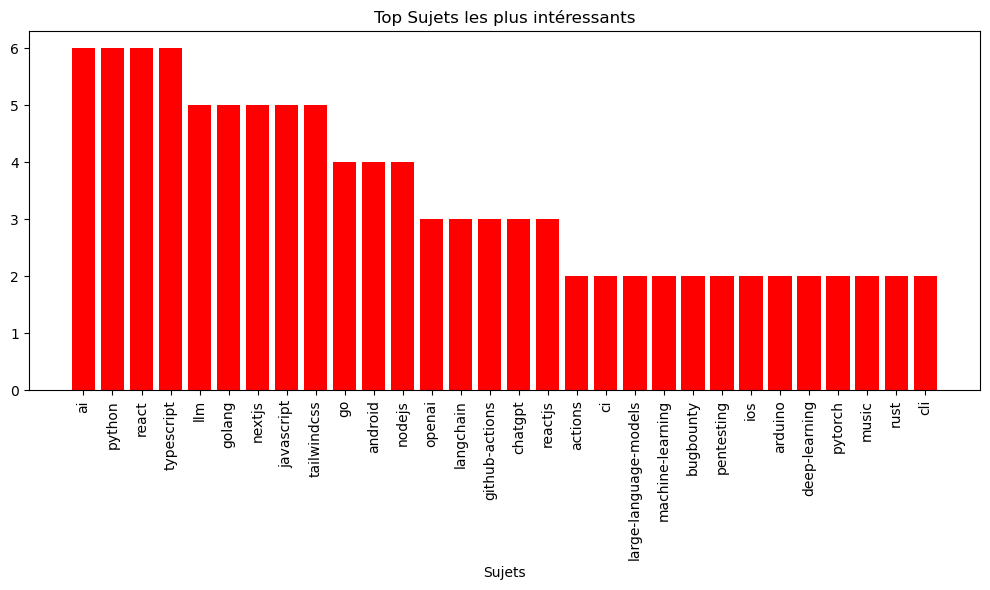

In [25]:
import matplotlib.pyplot as plt

# ... previous code ...

# Extract elements and counts for plotting
elements = [element for element, count in top_occurrences]
counts = [count for element, count in top_occurrences]

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(elements, counts, color = "red")
plt.xlabel('Sujets')
#plt.ylabel('Occurrences')
plt.title('Top Sujets les plus intéressants')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


Dans notre top 30 des sujets les plus intéressants, nous avons en premier lieu l'AI suivi de Python puis de React et de Typescript. Plus loin, nous avons Android, openAi, ChatGPT, le machine learning, le deep learning et pytorch. Globalement, les sujets d'IA et des sous-domaines et sujetsb liés à l'IA sont les plus fréquents. Cela confirme vrailment la tendance explosive des IA notamment génératives. Puis, nous avons le web et le mobile qui suivent. Cela est en adéquation avec notre précédente analyse sur les langages et technologies les plus utilisés. Faisons une représentation graphique pour une meilleure visualisation et une facilitation de l'analyse.

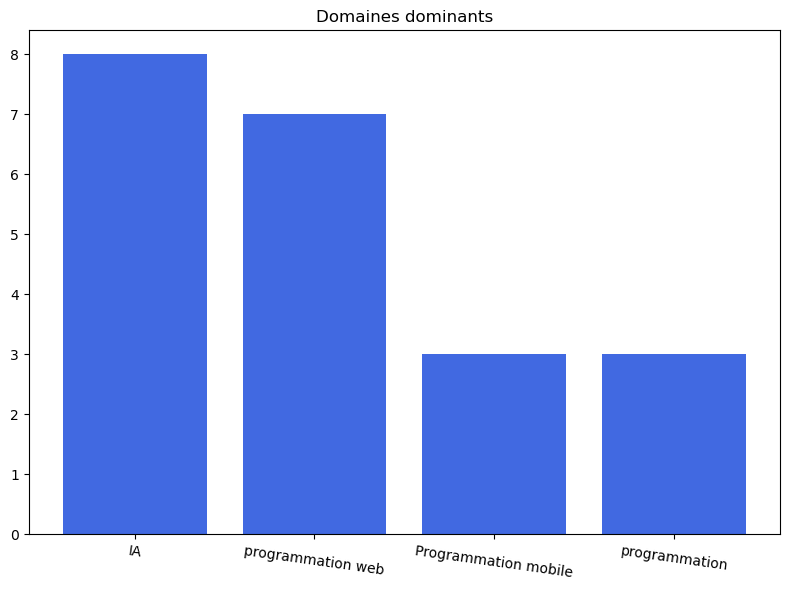

In [27]:
import matplotlib.pyplot as plt

# Regrouper les sujets dominants affiliés en des blocs  
domains = {
    "IA": 8,
    "programmation web": 7,
    "Programmation mobile": 3,
    "programmation": 3
}

# Extract domains and counts for plotting
labels = list(domains.keys())
counts = list(domains.values())

# Create a bar plot
plt.figure(figsize=(8, 6))
plt.bar(labels, counts, color="royalblue")
# plt.xlabel('Domains')
# plt.ylabel('Counts')
plt.title('Domaines dominants')
plt.xticks(rotation=-8)
plt.tight_layout()
plt.show()


# Quelles sont les tendances de développement ?

En se basant sur les langages et technologies les plus utilisés puis les sujets les plus intéressants et les plus récurrents, nous pouvons affirmer que les tendances de développment sont largement dominées par Python pour ce qui est de l'IA. Jupyter Notebook est beaucoup utilisé dans ce domaine comme environnement tout comme dans les projets de data science. Ce domaine connait une énorme énorme. Pas étonnant de voir les technologies inhérentes connaitre une certaine popularité. 
JavaScript principalement avec ses nombreux frameworks (React, NodeJS, NextJS, VueJS, Vite)  parmi lesquels React domine le web de son coté suivi des frameworks golang basé sur le langage Go.
Dart, Java, Swift, Kotlin et objective-C ressortent pour le développement des applications mobiles.
Les langages comme C, C++, C# et Rust apparaissent également en lice.

# Explorer de potentielles opportunités de collaboration

Vu que je n'avais pas extrait les informations des contributeurs, j'ai refait une extraction en incluant les informations des contributeurs. J'ai un nouveau dataset de seulement 1020 lignes. Je ferai l'analyse sur cet echantillon de données pour explorer les potentielles opportunités de collaborateurs. Pour cela, je m'appuierai sur le nombre de commits et le pourcentage de contribution des contributeurs. Les plus grands contributeurs démontrent d'un sérieux dans les projets. Colloborer avec eux nous assurera un travail harmonieux.

In [5]:
data_contrib = pd.read_csv("data_contrib.csv")

In [9]:
data_contrib.head(100)

,Repository,Sujets,Etoiles,Views,PullRequests,Forks,Langages,Contributeurs,shibing624_Commits,shibing624_PourcentageContribution,...,danieltott_Commits,danieltott_PourcentageContribution,bloodgroup-cplusplus_Commits,bloodgroup-cplusplus_PourcentageContribution,ozancanozdemir_Commits,ozancanozdemir_PourcentageContribution,agmredpenguin_Commits,agmredpenguin_PourcentageContribution,ostafen_Commits,ostafen_PourcentageContribution
0,shibing624/MedicalGPT,"['llama', 'chatgpt', 'gpt', 'llm', 'medical']",832,832,0,123,"['Python', 'Jupyter Notebook', 'Shell']",NaN,86.0,100.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BetterNCM/UwU,[],636,636,0,8,[],NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Vincenius/workout-lol,[],481,481,0,26,"['JavaScript', 'CSS']",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,megascatterbomb/MegaAntiCheat,[],293,293,12,14,['TypeScript'],NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,foundryzero/binder-trace,"['android', 'binder', 'ipc', 'reverse-engineer...",281,281,0,19,"['Python', 'JavaScript']",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,google/labs-prototypes,[],17,17,0,1,"['TypeScript', 'JavaScript']",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
96,ninjas-open-to-work/ninjas-open-to-work,[],17,17,0,0,"['HTML', 'Makefile']",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
97,Stebalien/org-capture-extension,"['org-mode', 'org-capture', 'web-extension']",17,17,0,0,"['JavaScript', 'HTML', 'Makefile', 'CSS']",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
98,uchiha123456/graphql-tools,"['graphql', 'graphql-api', 'graphql-scalars', ...",17,17,0,0,['TypeScript'],NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
data_contrib.shape

(1020, 4402)

In [20]:
data_contrib.duplicated().sum()

39

Il ya 39 duplications que je vais supprimer.

In [22]:
data_contrib["Contributeurs"].isna().sum()

1020

On va essayer de remplir la colonne Contributeurs par le nombre de contributeurs (Le nombre de colonnes suivantes/2) car chaque contributeur est assorti avec son pourcentage de contribution.

In [18]:
contrib = data_contrib.iloc[:, 7:]
contrib

,Contributeurs,shibing624_Commits,shibing624_PourcentageContribution,MicroCBer_Commits,MicroCBer_PourcentageContribution,bqqnt-bot_Commits,bqqnt-bot_PourcentageContribution,Vincenius_Commits,Vincenius_PourcentageContribution,Snouzy_Commits,...,danieltott_Commits,danieltott_PourcentageContribution,bloodgroup-cplusplus_Commits,bloodgroup-cplusplus_PourcentageContribution,ozancanozdemir_Commits,ozancanozdemir_PourcentageContribution,agmredpenguin_Commits,agmredpenguin_PourcentageContribution,ostafen_Commits,ostafen_PourcentageContribution
0,NaN,86.0,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,4.0,80.0,1.0,20.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,75.0,72.115385,29.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,49.0,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.0,100.0,NaN,NaN,NaN,NaN,NaN,NaN
1017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,3.0,100.0,NaN,NaN,NaN,NaN
1018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,3.0,100.0,NaN,NaN


In [ ]:
contrib["Contributeurs"] = 